Color quantization finds a small number of representative colors within a given picture. Each pixel yields one 3-dimensional pattern in the RGB color space. Using K-means we can cluster all the pixels of an image into k clusters and assign each pixel the color represented by its nearest cluster center. Thereby, an image containing millions of colors can be compressed to an image containing k different colors only.
1. Load an image of your choice, treat each pixel as a 3-dimensional data point, and cluster the pixels into k clusters. Use the methods discussed in class to find the best k.
2. Assign each pixel the color value of its nearest cluster center.
3. Visualize the result.
4. Now use mini-batch K-means for the clustering. How much gain in performance did you get?

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import MiniBatchKMeans, KMeans
import time

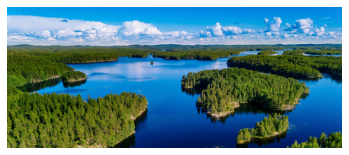

In [2]:
# Reading the image and converting into RGB

image = cv2.imread("test.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.axis("off")
plt.imshow(image)

In [3]:
h,w,c = image.shape
image.shape

(432, 1028, 3)

In [6]:
def init_kmeans(feats, k):
    '''
    This function takes the image and k and fits the k-means clustering
    '''
    return  KMeans(n_clusters=k).fit(feats)


def kmeans_sklearn(image_2d, K):
    '''
    This function takes the 2-d image array and value of k and finds the optimal k
    '''
    
    # 1. Clustering pixels into k clusters
    sse = []
    K = range(1, K)
    for k in K:
        kmeanModel = init_kmeans(image_2d, k)
        sse.append(kmeanModel.inertia_)
      
    # 2. Finding the best k
    plt.plot(K, sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()



def assign_color(image, k):
    '''
    This function takes image and optimal k as an input and assigns centroid color to the pixels and
    plots the clustered image
    '''

    # 2. Assigning color of nearest centroid to pixels
    kmeanModel = init_kmeans(image, k)
    cluster = kmeanModel.labels_
    centroids = kmeanModel.cluster_centers_
    cluster_color = image.copy()
    for i in range(k):
        mask = cluster == i
        cluster_color[mask] = centroids[i]
      
    # 3. Visualize the result
    plt.imshow(np.reshape(cluster_color, (h,w,c)))
    
    
def compare_performance(image, k):
    '''
    This function takes the 2-d image array and optimal k and runs both k-means and mini batch k-means and,
    compares the performance of the two in terms of time and inertia
    '''

    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    t0 = time.time()
    k_means.fit(image)
    t_batch = time.time() - t0
    print("Time taken for k-means : ", t_batch)
    print("Inertia of k-means : ", k_means.inertia_)

    
    # Compute clustering with MiniBatchKMeans
    mini_batch = MiniBatchKMeans(init='k-means++', n_clusters=k, batch_size=50, n_init=10)
    t0 = time.time()
    mini_batch.fit(image)
    t_mini_batch = time.time() - t0
    print("Time taken for mini batch k-means : ", t_mini_batch)
    print("Inertia of mini batch k-means : ", mini_batch.inertia_)


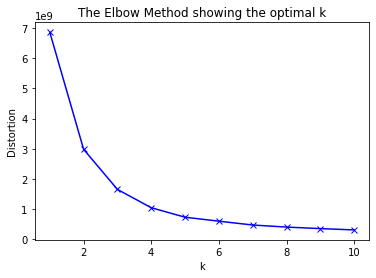

Time taken for k-means :  1.4676029682159424
Inertia of k-means :  1044090254.4016036
Time taken for mini batch k-means :  1.3755018711090088
Inertia of mini batch k-means :  1046009591.4622244


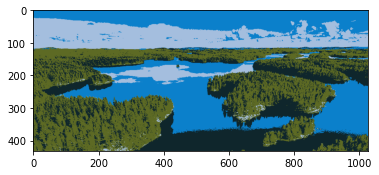

In [7]:
# Function calls

# Get image shape
h,w,c = image.shape

# Reshape in 2d array
image_2d = np.reshape(image, (h*w, c))

# Find clusters and the optimal k
kmeans_sklearn(image_2d, 11)

# Optimal k is 4 for this image
best_k = 4

# Assign the centroid colors to the pixels
assign_color(image_2d, best_k)

# Compare the performance
compare_performance(image_2d, best_k)

**Observations:**

We see that time taken for mini batch k-means is less in comparison to the k-means clustering but the inertia which is the sum of square error is more for mini-batch k-means and less for k-means clustering.


Gain in performance is only in terms of time. The time for mini batch for this image is 1.37 seconds while for k-means is 1.46 seconds.